In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_defaults()

# Airbnb listings dataset

In [122]:
df = pd.read_excel('/content/airbnb_listings.xlsx')
df.head(10)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaT,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaT,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaT,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
5,1039,2008-07-25,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0
6,1783,2008-08-12,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0
7,2078,2008-08-15,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0
8,2339,2008-08-20,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270,90.0
9,2339,2008-08-20,Lovely 2 Bedroom East Village Nest,Manhattan,Apartment,95.0,Entire home/apt,10009.0,2.0,1,23,290,96.0


### Understanding the dataset

In [123]:
df.shape

(30478, 13)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Host Id                     30478 non-null  int64         
 1   Host Since                  30475 non-null  datetime64[ns]
 2   Name                        30478 non-null  object        
 3   Neighbourhood               30478 non-null  object        
 4   Property Type               30475 non-null  object        
 5   Review Scores Rating (bin)  22155 non-null  float64       
 6   Room Type                   30478 non-null  object        
 7   Zipcode                     30344 non-null  float64       
 8   Beds                        30393 non-null  float64       
 9   Number of Records           30478 non-null  int64         
 10  Number Of Reviews           30478 non-null  int64         
 11  Price                       30478 non-null  int64     

In [125]:
df.describe()

,Host Id,Host Since,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
count,3.047800e+04,30475,22155.000000,30344.000000,30393.000000,30478.0,30478.000000,30478.000000,22155.000000
mean,1.273171e+07,2013-06-29 17:56:15.317473280,90.738659,10584.854831,1.530089,1.0,12.018735,163.589737,91.993230
min,5.000000e+02,2008-06-26 00:00:00,20.000000,1003.000000,0.000000,1.0,0.000000,10.000000,20.000000
25%,2.701298e+06,2012-06-21 00:00:00,85.000000,10017.000000,1.000000,1.0,0.000000,80.000000,89.000000
50%,8.551693e+06,2013-09-01 00:00:00,90.000000,10065.000000,1.000000,1.0,3.000000,125.000000,94.000000
75%,2.120617e+07,2014-09-12 00:00:00,100.000000,11216.000000,2.000000,1.0,13.000000,195.000000,100.000000
max,4.303307e+07,2015-08-31 00:00:00,100.000000,99135.000000,16.000000,1.0,257.000000,10000.000000,100.000000
std,1.190270e+07,NaN,9.059519,921.299397,1.015359,0.0,21.980703,197.785454,8.850373


#### Examining columns I don't understand

In [126]:
df['Review Scores Rating (bin)'].unique()

array([ nan,  95., 100.,  90.,  85.,  80.,  75.,  65.,  70.,  60.,  40.,
        50.,  20.,  55.,  45.,  30.])

In [127]:
df['Review Scores Rating'].unique()

array([ nan,  96., 100.,  94.,  90.,  98.,  93.,  91.,  97.,  95.,  99.,
        85.,  86.,  80.,  88.,  92.,  89.,  82.,  87.,  81.,  76.,  78.,
        83.,  66.,  84.,  72.,  79.,  60.,  40.,  62.,  74.,  77.,  50.,
        71.,  75.,  73.,  69.,  65.,  68.,  70.,  67.,  64.,  20.,  57.,
        58.,  43.,  63.,  55.,  47.,  53.,  49.,  30.])

In [128]:
df['Number of Records'].unique()

array([1])

Since the 'Number of Records' attribute isn't adding any useful information we can drop it from the analysis

In [129]:
df.drop(['Number of Records'], axis=1, inplace=True)

In [130]:
df.columns

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number Of Reviews', 'Price', 'Review Scores Rating'],
      dtype='object')

### Cleaning and Data Preprocessing

#### Handling missing values

In [131]:
df.isnull().sum()

,0
Host Id,0
Host Since,3
Name,0
Neighbourhood,0
Property Type,3
Review Scores Rating (bin),8323
Room Type,0
Zipcode,134
Beds,85
Number Of Reviews,0


- After analyzing the number of missing values per column I have decided that since the missing values for the 'Host Since' and 'Property Type' are both too few to matter so I'll be dropping them </br>
- The 'zipcode' isn't that important for my analysis now so i'll fill it with 0 </br>
- The 'Beds' column will be filled with median as its the safest

In [132]:
df['Zipcode'].fillna(0, inplace=True)
df['Beds'].fillna(df['Beds'].median(), inplace=True)
df.dropna(subset=['Host Since', 'Property Type'], inplace=True)

/tmp/ipython-input-1995258376.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-1995258376.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

#### Changing Data types

In [133]:
df['Beds'] = df['Beds'].astype(int)

The columns that are important for the analysis are the 'Review Scores Rating (bin)' and 'Review Scores Rating'. Instead of blindly filling them with means and medians i have decided on filling them based on similar listings (by property type, room type, or neighbourhood)

In [134]:
df['Review Scores Rating'] = df.groupby(['Property Type',
                                         'Room Type',
                                         'Neighbourhood '])['Review Scores Rating'].transform(lambda x: x.fillna(x.mean()))

df['Review Scores Rating (bin)'] = df.groupby(['Property Type',
                                         'Room Type',
                                         'Neighbourhood '])['Review Scores Rating (bin)'].transform(lambda x: x.fillna(x.mean()))

In [135]:
df.columns = df.columns.str.strip() # a few column names have extra white space

In [136]:
df.isnull().sum()

,0
Host Id,0
Host Since,0
Name,0
Neighbourhood,0
Property Type,0
Review Scores Rating (bin),25
Room Type,0
Zipcode,0
Beds,0
Number Of Reviews,0


Checking the few records left having missing ratings and why?

In [137]:
df[df.isnull().any(axis=1)]

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number Of Reviews,Price,Review Scores Rating
9830,4010950,2012-10-30,Relaxing Loft - min from Midtown,Queens,Loft,NaN,Shared room,11101.0,1,0,55,NaN
10015,4107600,2012-11-09,Dreamy Bright Bedroom,Brooklyn,Treehouse,NaN,Private room,11222.0,1,2,95,NaN
13172,6403510,2013-05-15,NHGBR SWEET SPACE,Brooklyn,Tent,NaN,Private room,11237.0,1,0,65,NaN
13817,6967263,2013-06-17,"Rent Me Summer, Fall, or Winter",Queens,Hut,NaN,Private room,11372.0,2,0,100,NaN
15741,9139190,2013-09-30,Private BR in Huge 3 br Loft,Manhattan,Tent,NaN,Private room,10013.0,1,2,150,NaN
17195,10654938,2013-12-16,"New York convenient, cool big room",Staten Island,House,NaN,Shared room,10304.0,1,0,59,NaN
19693,15269739,2014-05-08,Lovely landmark Italian Limestone,Brooklyn,Villa,NaN,Entire home/apt,11215.0,4,0,1500,NaN
20624,16978260,2014-06-19,BEAUTIFUL SPACIOUS STUDIO,Manhattan,Bed & Breakfast,NaN,Shared room,0.0,1,0,70,NaN
20625,16978260,2014-06-19,"BEAUTIFUL, HUGE STUDIO IN HARLEM!",Manhattan,Bed & Breakfast,NaN,Shared room,11419.0,1,0,75,NaN
21720,19049159,2014-07-28,Beautiful artist loft in Brooklyn,Brooklyn,Tent,NaN,Private room,11221.0,1,0,250,NaN


since the missing ones are spread across different neighbourhoods (not one pattern/group), it’s most likely just random data entry gaps and not meaningful missingness. So i'll be dropping them

In [138]:
df.dropna(inplace=True)


In [139]:
df.isnull().sum()

,0
Host Id,0
Host Since,0
Name,0
Neighbourhood,0
Property Type,0
Review Scores Rating (bin),0
Room Type,0
Zipcode,0
Beds,0
Number Of Reviews,0


#### Handling duplicates if existing

In [140]:
print(df.duplicated().sum())

17


In [141]:
df.drop_duplicates(inplace=True)

In [142]:
df['Number Of Reviews'].unique()

array([  0,  39,   4,   9,  80,  95,  23,  14, 120,  81,  17,  32,  52,
         3, 171,   1,  16,  19,   2,  28,  62,   6,   5,  12,  40,  47,
        13,  35,  34,  68,  42,   7,  41,  15,  21,   8,  10,  29, 112,
        25, 132,  51, 156,  30,  98,  24,  74,  20, 188, 221,  57,  11,
       242,  67, 118,  60, 136, 119,  79, 106,  43,  91, 105,  96, 141,
       146,  63,  58,  18, 150,  38,  55,  89,  46,  77,  48,  36,  69,
        26,  73,  53, 165,  92,  87, 108, 109,  50, 127,  88,  83, 184,
       179,  22,  31,  82,  27, 123, 247, 190, 257, 217,  85, 103, 157,
       102,  56, 125, 115,  49,  97,  54,  65,  90,  44,  33, 100,  37,
       107, 114, 116,  61, 104,  71,  75, 145,  84,  93, 110, 172, 148,
       131, 154,  86,  64,  76, 129,  45, 180, 140,  78, 200, 175, 189,
       170, 187,  72, 137,  99, 101,  59,  94, 124, 223, 173, 151, 142,
       163, 121, 256, 248, 149, 128, 133,  66, 117, 176, 111,  70, 183,
       218, 192, 206, 161, 216, 191, 213, 178, 122, 153, 177, 16

#### Feature Engineering
Having an attribute to give us an accurate review metric since some listings have super high ratings but only a few reviews which is kind of misleading so to fix that, I made a new feature called Weighted_Rating that gives more trust to listings with more reviews having higher rating than the listings with lesser views and higher ratings

In [143]:
df['Weighted_Rating'] = (df['Review Scores Rating (bin)'] * df['Number Of Reviews']) / (df['Number Of Reviews'] + 10)

In [144]:
df.columns

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number Of Reviews', 'Price', 'Review Scores Rating',
       'Weighted_Rating'],
      dtype='object')

### Univariate Analysis: (Handling Outliers)

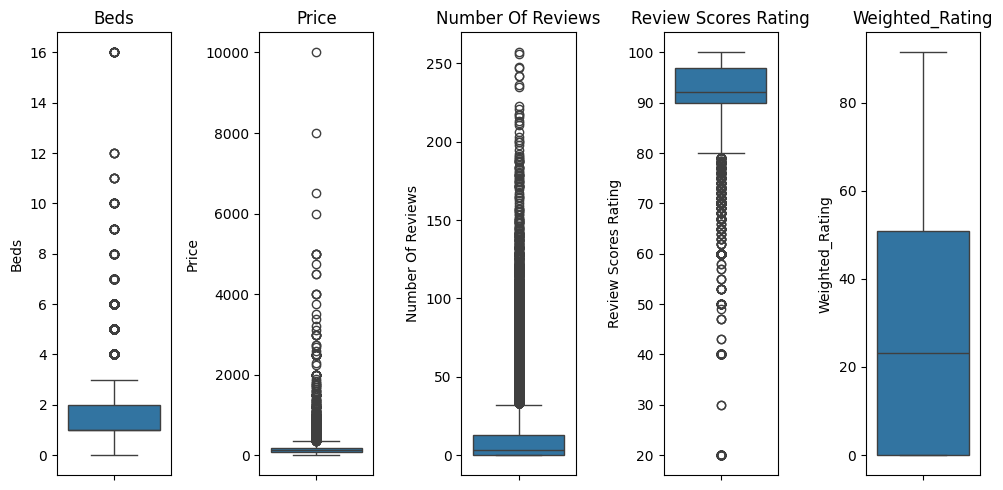

In [145]:
numeric_cols = ['Beds', 'Price', 'Number Of Reviews', 'Review Scores Rating', 'Weighted_Rating']

plt.figure(figsize=(10, 5))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

These outliers seem to reflect real-world differences (like larger properties or luxury listings), so I chose not to remove them

###### **Graphical Integrity and visualisation principles**
- Box plots clearly show median, quartiles, and outliers, efficiently summarizing data distribution, which maximizes data-ink ratio.

- Maintains graphical integrity because the whiskers and boxes accurately represent the spread and outliers.

- Very effective for comparing distributions across groups, applying principles of clarity and precision.

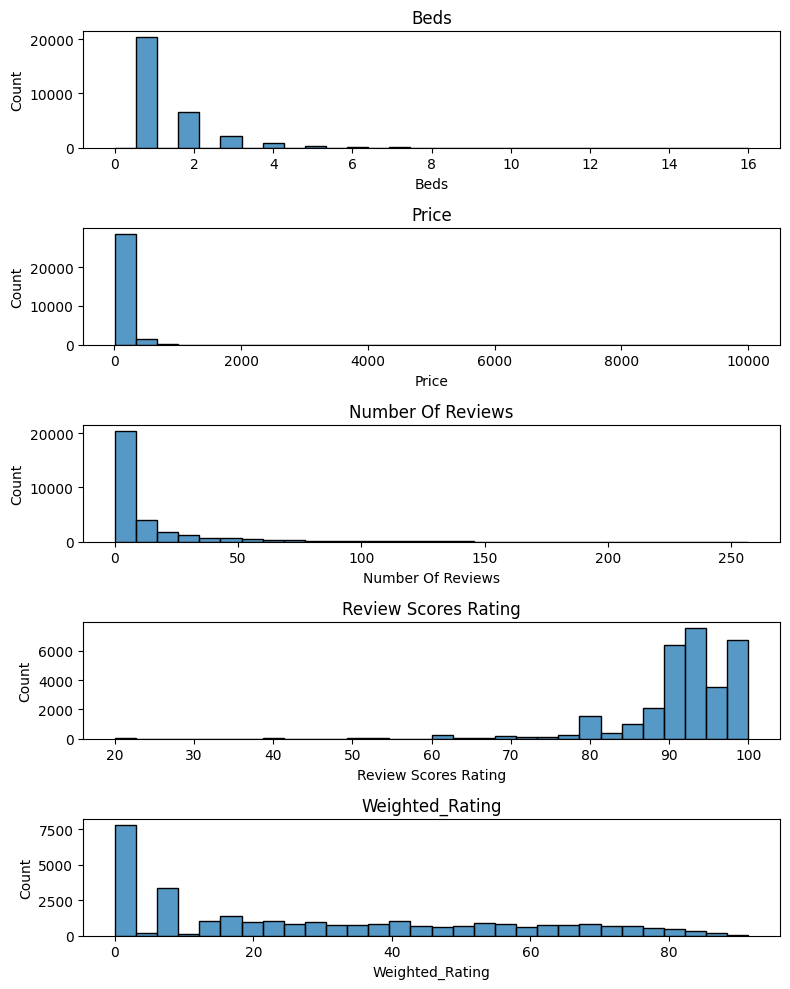

In [146]:
plt.figure(figsize=(8, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 1, i)
    sns.histplot(x=df[col], bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

###### **Graphical Integrity and visualisation principles**
- good for showing distribution; follows Tufte’s principle if bars start at zero and spacing is minimal.

- Maintains graphical integrity as bin sizes are appropriate and not misleading.

### Bivariate Analysis:

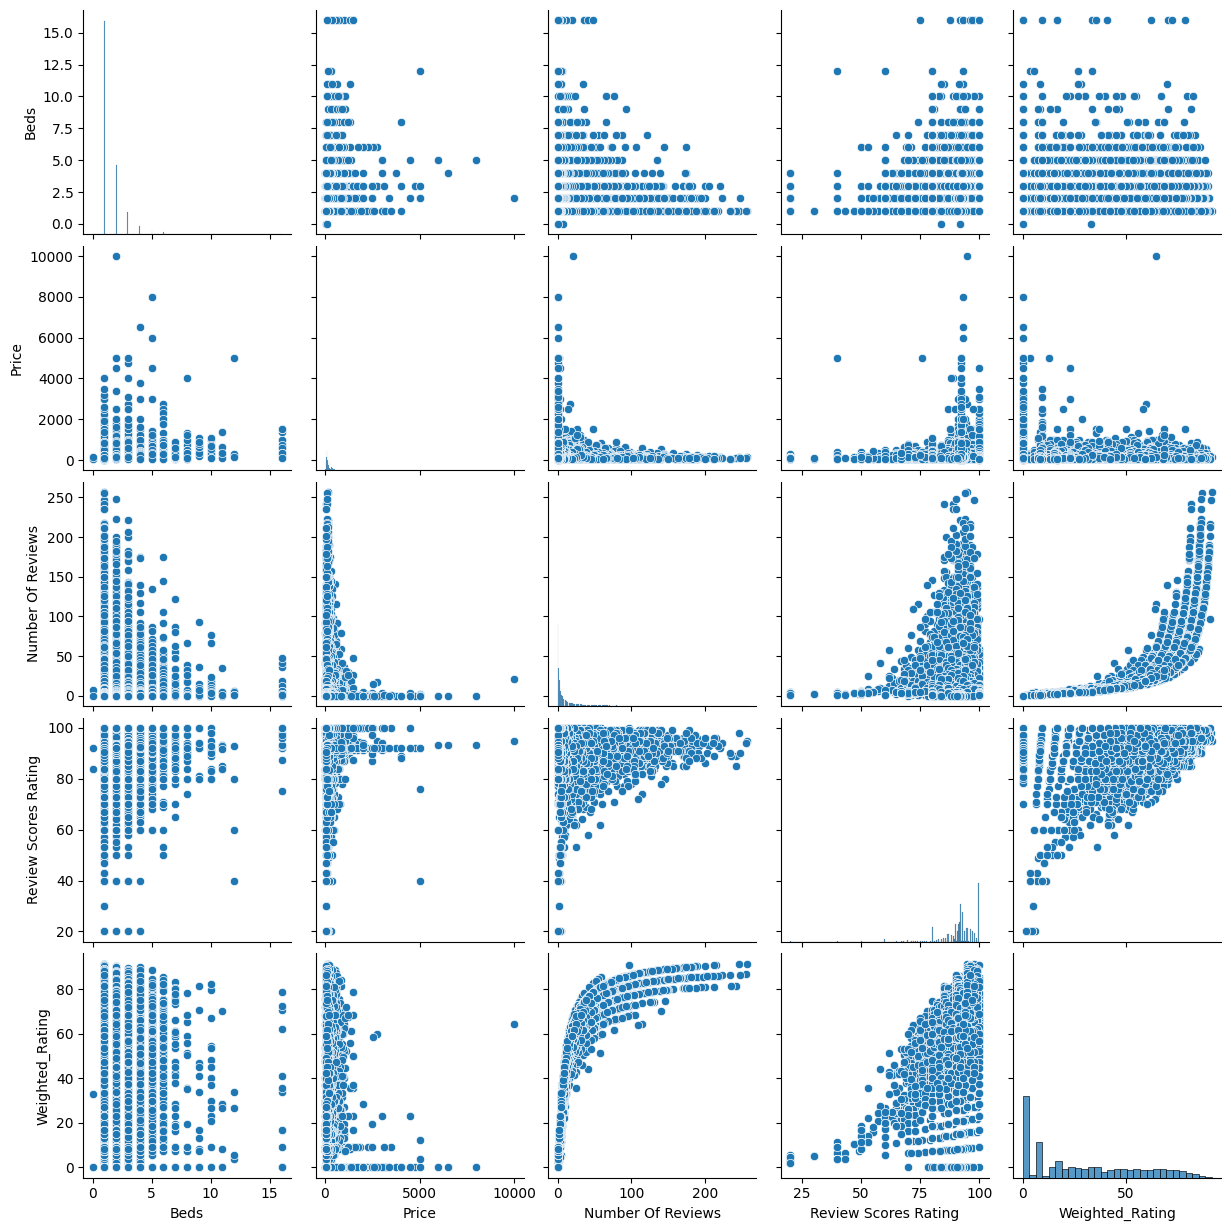

In [147]:
sns.pairplot(df[numeric_cols])
plt.savefig("my_plot.png", dpi=300, bbox_inches='tight')
plt.show()
plt.show()

###### **Graphical Integrity and visualisation principles**:

- Pair plots show all pairwise relationships, making trends and correlations easy to see, which maximizes data-ink ratio by compactly showing multiple plots.

- Maintains graphical integrity as scatterplots and histograms are scaled properly.

- the design principle of efficient multi-dimensional comparison is applied.

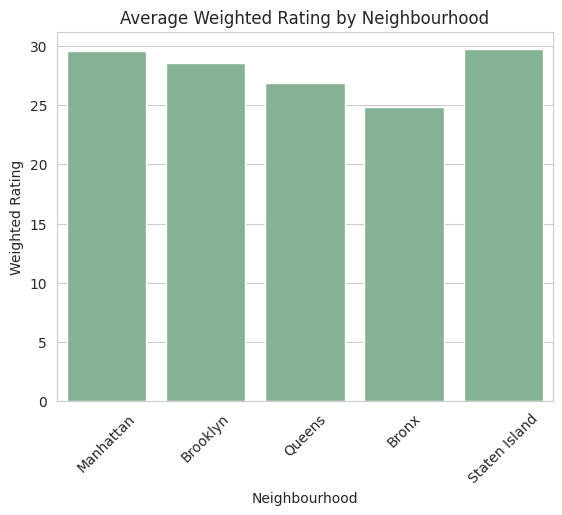

In [148]:
sns.set_style("whitegrid")
sns.set_palette("crest")
sns.barplot(x='Neighbourhood', y='Weighted_Rating', data=df, errorbar=None)
plt.title('Average Weighted Rating by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Weighted Rating')
plt.xticks(rotation=45)
plt.show()
sns.reset_defaults()

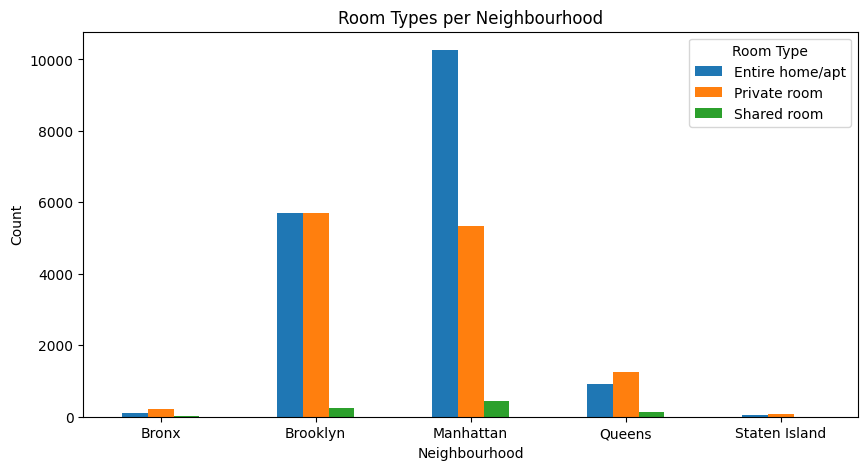

In [149]:
counts = df.groupby(['Neighbourhood', 'Room Type']).size().unstack(fill_value=0)
counts.plot(kind='bar', figsize=(10,5))
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Room Types per Neighbourhood')
plt.show()

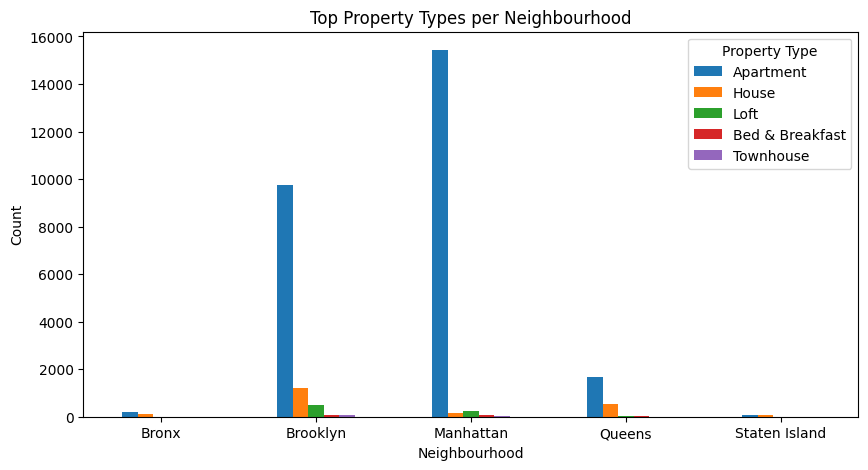

In [150]:
counts = df.groupby(['Neighbourhood', 'Property Type']).size().unstack(fill_value=0)
top_props = counts.sum(axis=0).sort_values(ascending=False).head(5).index

counts[top_props].plot(kind='bar', figsize=(10,5))
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Top Property Types per Neighbourhood')
plt.show()

###### **Graphical Integrity and visualisation principles**:

- The bars clearly show differences between categories, so the data is easy to interpret.

- The graph mostly follows Tufte’s principle of maximizing data-ink since there’s minimal decoration.

- gridlines or unnecessary colors, could slightly reduce data-ink ratio.

- Overall, it maintains graphical integrity as the heights accurately represent the values.

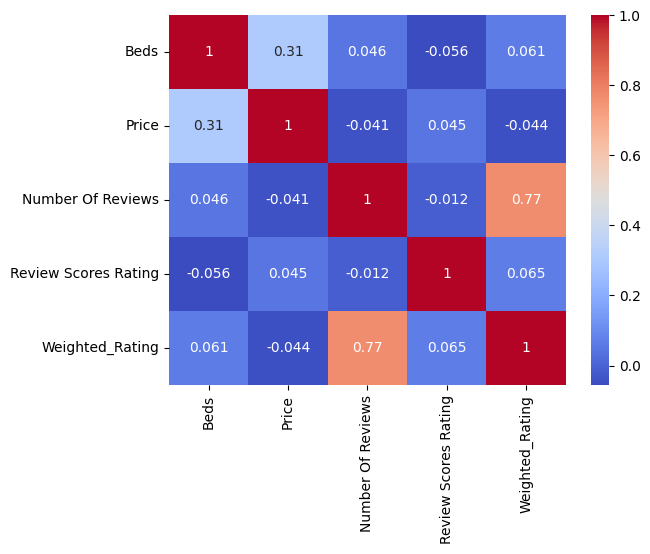

In [151]:
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### Multivariate Analysis:

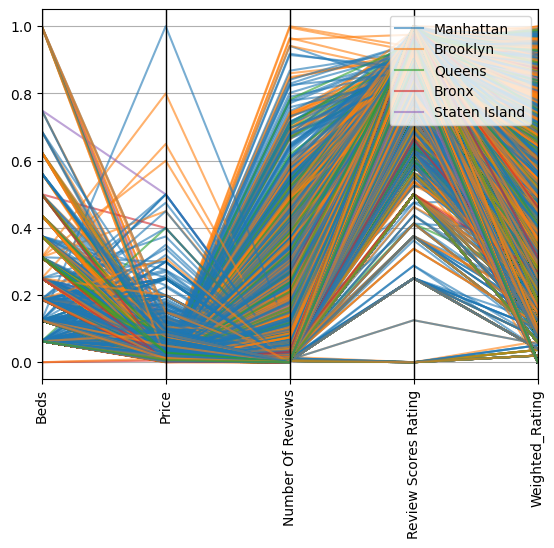

In [152]:
from sklearn.preprocessing import MinMaxScaler

# scaling the numerical columns because the plot isn't making
# much sense since price is dominating
scaled_df = df.copy()
scaler = MinMaxScaler()
scaled_df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

from pandas.plotting import parallel_coordinates

colors = sns.color_palette("tab10")
parallel_coordinates(scaled_df[numeric_cols + ['Neighbourhood']], 'Neighbourhood', color=colors, alpha=0.6)
plt.xticks(rotation=90)
plt.show()


###### **Graphical Integrity and visualisation principles**:

- Parallel plots show relationships across multiple variables, which is efficient but can get cluttered with many lines.

- Data-ink ratio is moderate as lines convey data, but overlapping lines can reduce clarity.

- Graphical integrity is maintained if axes are scaled properly and no lines are misleadingly emphasized.

In [153]:
import plotly.express as px

fig = px.scatter(
    df,
    color='Neighbourhood',
    y='Price',
    x='Beds',
    facet_col='Room Type',
    title='Price vs beds across Neighbourhoods by Room Type'
)

fig.update_layout(height=500, width=1100)
fig.show()


###### **Graphical Integrity and visualisation principles**:

- Trellis plots show multiple scatter plots side by side, making it easy to compare groups, which maximizes data-ink ratio by reusing axes and layouts.

- Maintains graphical integrity because each panel uses the same scale, so comparisons are accurate.

- Could be slightly cluttered if there are too many panels, but still clear overall.

### Hypothesis:

<b>Statement</b>: </br>
In the Airbnb dataset, listings with more beds tend to have lower to moderate prices.

<b>Reasoning</b>: </br>
From the pairplot and parallel coordinates plot, you can see many lines where beds increase but price decreases or are affordable to the ones with lower beds.

<b>Another Observation</b>: </br>
A few listings with fewer beds but high prices are likely luxury or central-location properties, which supports that price is driven more by location and quality than room size. Hence they might have higher Ratings?


### Testing our Hypothesis:

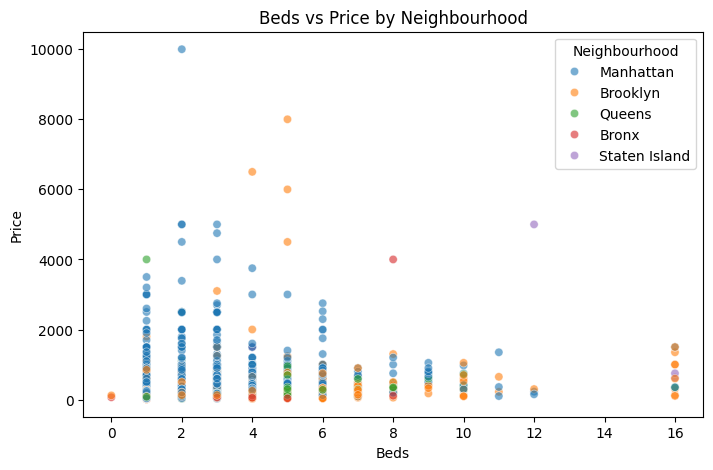

In [154]:
# Seeing the relationshhip of Beds vs Price using scater plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Beds', y='Price', hue='Neighbourhood', alpha=0.6)
plt.title('Beds vs Price by Neighbourhood')
plt.show()


The scatter plot shows weak to no relation existing!

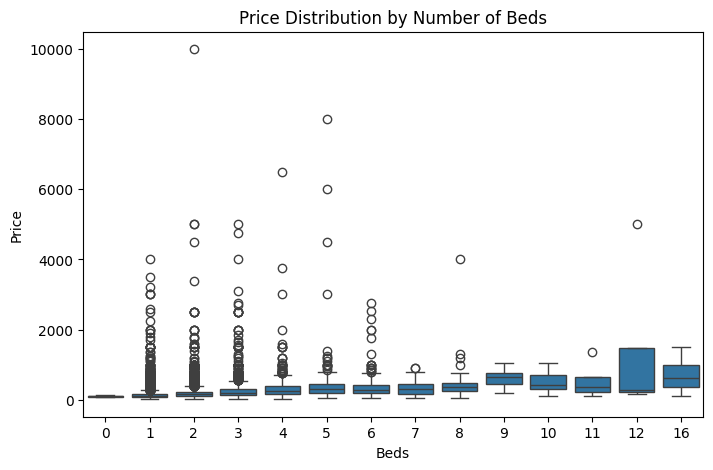

In [155]:
# using box plot for seeing price distribution across different Bed counts
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Beds', y='Price')
plt.title('Price Distribution by Number of Beds')
plt.show()


the median line stays roughly the same across 1–7 beds.
some boxes have many high outliers, meaning a few expensive listings exist, but most prices are low to moderate.
this again means: adding more beds doesn’t really increase price overall.

In [156]:
# seeeing correlation between Beds and Price
corr = df[['Beds', 'Price']].corr().iloc[0,1]
print(f"Correlation between Beds and Price: {corr:.3f}")

Correlation between Beds and Price: 0.314


0.314 is a weak positive correlation, meaning there’s some tendency that more beds → slightly higher price, but it’s not strong enough to call it a rule.
hence prices can rise with beds sometimes, but not consistently.

### Conclusion:
The hypothesis is partly supported.
While the data shows that prices don’t rise consistently with more beds, it doesn’t strongly prove that more beds lead to lower prices either.
This suggests that factors like location, room type, or property type have a greater impact on pricing than the number of beds.

# Football World cup Matches (1930-2014) records dataset

In [157]:
dataset = pd.ExcelFile("football_world_cups_results.xlsx")
print(dataset.sheet_names)

['WorldCupMatches', 'World Cup - Tableau format', 'WorldCups']


In [158]:
Fdf = pd.read_excel("football_world_cups_results.xlsx", sheet_name="WorldCupMatches")

## Sheet 01: WorldCupMatches

### Understanding the dataset

In [159]:
Fdf.head()

,Year,Date,Time,Round,Stadium,City,Country,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation
0,1930,1930-07-13,15:00,Group 1,Pocitos,Montevideo,Uruguay,France,4,1,Mexico,
1,1930,1930-07-13,15:00,Group 4,Parque Central,Montevideo,Uruguay,USA,3,0,Belgium,
2,1930,1930-07-14,12:45,Group 2,Parque Central,Montevideo,Uruguay,Yugoslavia,2,1,Brazil,
3,1930,1930-07-14,14:50,Group 3,Pocitos,Montevideo,Uruguay,Romania,3,1,Peru,
4,1930,1930-07-15,16:00,Group 1,Parque Central,Montevideo,Uruguay,Argentina,1,0,France,


In [160]:
Fdf.shape

(852, 12)

In [161]:
Fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         852 non-null    int64         
 1   Date         852 non-null    datetime64[ns]
 2   Time         852 non-null    object        
 3   Round        852 non-null    object        
 4   Stadium      852 non-null    object        
 5   City         852 non-null    object        
 6   Country      852 non-null    object        
 7   HomeTeam     852 non-null    object        
 8   HomeGoals    852 non-null    int64         
 9   AwayGoals    852 non-null    int64         
 10  AwayTeam     852 non-null    object        
 11  Observation  852 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 80.0+ KB


In [162]:
Fdf.describe()

,Year,Date,HomeGoals,AwayGoals
count,852.000000,852,852.000000,852.000000
mean,1985.089202,1985-07-22 11:49:51.549295744,1.811033,1.022300
min,1930.000000,1930-07-13 00:00:00,0.000000,0.000000
25%,1970.000000,1970-06-07 00:00:00,1.000000,0.000000
50%,1990.000000,1990-06-14 00:00:00,2.000000,1.000000
75%,2002.000000,2002-06-22 00:00:00,3.000000,2.000000
max,2014.000000,2014-07-13 00:00:00,10.000000,7.000000
std,22.448825,NaN,1.610255,1.087573


#### Examining columns I don't understand

In [163]:
Fdf['Observation'].unique()

array([' ', 'Austria win after extra time ',
       'Italy win after extra time ', 'Brazil win after extra time ',
       'Czechoslovakia win after extra time ',
       'Hungary win after extra time ',
       'Northern Ireland win after extra time ',
       'England win after extra time ',
       'Germany FR win after extra time ',
       'Uruguay win after extra time ', 'Argentina win after extra time ',
       ' win on penalties (5 - 4) ', 'Belgium win after extra time ',
       'France win on penalties (3 - 4) ',
       'Germany FR win on penalties (4 - 1) ',
       'Belgium win on penalties (4 - 5) ',
       'France win after extra time ', 'Cameroon win after extra time ',
       'Republic of Ireland win on penalties (5 - 4) ',
       'Yugoslavia win after extra time ', ' win on penalties (2 - 3) ',
       ' win on penalties (3 - 4) ', ' win on penalties (4 - 3) ',
       'Bulgaria win on penalties (1 - 3) ',
       'Sweden win on penalties (4 - 5) ',
       'Brazil win on penaltie

In [164]:
Fdf['Round'].unique()

array(['Group 1', 'Group 4', 'Group 2', 'Group 3', 'Semi-finals', 'Final',
       'Preliminary round', 'Quarter-finals', 'Match for third place',
       'First round', 'Group 6', 'Group B', 'Group A', 'Group 5',
       'Group C', 'Group D', 'Group F', 'Group E', 'Round of 16',
       'Group H', 'Group G', 'Third place', 'Play-off for third place'],
      dtype=object)

### Cleaning and Data Preprocessing

#### Handling missing values

In [165]:
Fdf.isnull().sum()

,0
Year,0
Date,0
Time,0
Round,0
Stadium,0
City,0
Country,0
HomeTeam,0
HomeGoals,0
AwayGoals,0


#### Handling duplicates if existing

In [166]:
print(Fdf.duplicated().sum())

16


In [167]:
Fdf.drop_duplicates(inplace=True)

#### Feature Engineering
Simplifying rounds into broader categories for easier analysis

In [168]:
def simplify_round(r):
    if "Group" in r or "First" in r or "Preliminary" in r:
        return "Group Stage"
    elif "16" in r:
        return "Round of 16"
    elif "Quarter" in r:
        return "Quarter-finals"
    elif "Semi" in r:
        return "Semi-finals"
    elif "Final" in r and "Third" not in r:
        return "Final"
    elif "Third" in r or "Play-off" in r:
        return "Third place"
    else:
        return "Other"

Fdf['Round_Broad_Category'] = Fdf['Round'].apply(simplify_round)

In [169]:
Fdf.columns

Index(['Year', 'Date', 'Time', 'Round', 'Stadium', 'City', 'Country',
       'HomeTeam', 'HomeGoals', 'AwayGoals', 'AwayTeam', 'Observation',
       'Round_Broad_Category'],
      dtype='object')

### Univariate Analysis: (Handling Outliers)

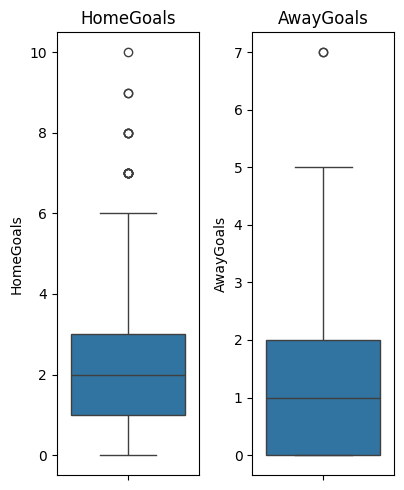

In [170]:
numeric_cols = ['HomeGoals', 'AwayGoals']

plt.figure(figsize=(10, 5))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=Fdf[col])
    plt.title(col)

plt.tight_layout()
plt.show()

###### **Graphical Integrity and visualisation principles**
- Box plots clearly show median, quartiles, and outliers, efficiently summarizing data distribution, which maximizes data-ink ratio.

- Maintains graphical integrity because the whiskers and boxes accurately represent the spread and outliers.

- Very effective for comparing distributions across groups, applying principles of clarity and precision.

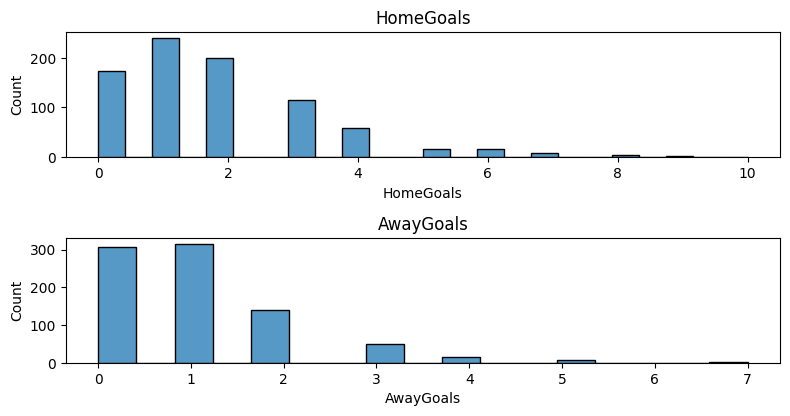

In [171]:
plt.figure(figsize=(8, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 1, i)
    sns.histplot(x=Fdf[col])
    plt.title(col)

plt.tight_layout()
plt.show()

###### **Graphical Integrity and visualisation principles**
- good for showing distribution; follows Tufte’s principle if bars start at zero and spacing is minimal.

- Maintains graphical integrity as bin sizes are appropriate and not misleading.

### Bivariate Analysis:

In [172]:
matchups = Fdf.groupby(['HomeTeam', 'AwayTeam']).size().reset_index(name='MatchCount')
Top_rivalries = matchups.sort_values(by='MatchCount', ascending=False).head(10)
Top_rivalries

,HomeTeam,AwayTeam,MatchCount
109,Brazil,Sweden,5
87,Brazil,Czechoslovakia,5
337,Italy,France,5
227,France,Mexico,4
103,Brazil,Poland,4
97,Brazil,Mexico,4
401,Netherlands,Argentina,4
325,Italy,Argentina,4
91,Brazil,France,4
327,Italy,Austria,4


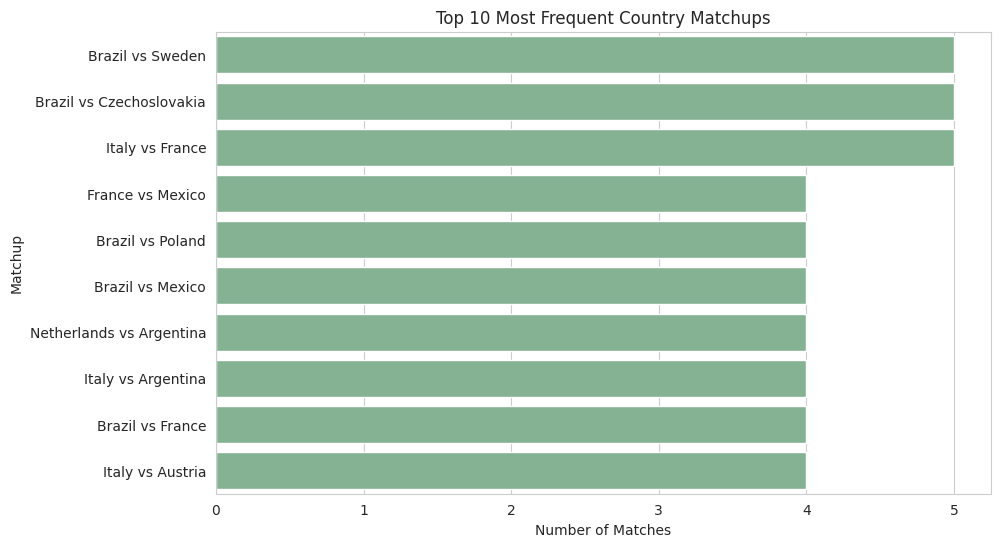

In [173]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("crest")

sns.barplot(data=Top_rivalries, x='MatchCount', y=Top_rivalries['HomeTeam'] + ' vs ' + Top_rivalries['AwayTeam'])

plt.xlabel('Number of Matches')
plt.ylabel('Matchup')
plt.title('Top 10 Most Frequent Country Matchups')
plt.show()
sns.reset_defaults()

###### **Graphical Integrity and visualisation principles**:

- The bars clearly show differences between categories, so the data is easy to interpret.

- The graph mostly follows Tufte’s principle of maximizing data-ink since there’s minimal decoration.

- gridlines or unnecessary colors, could slightly reduce data-ink ratio.

- Overall, it maintains graphical integrity as the heights accurately represent the values.

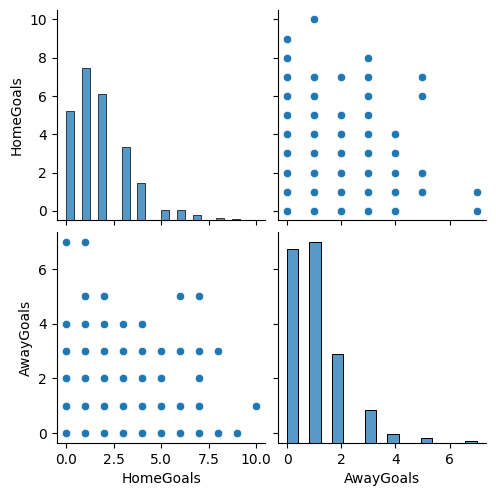

In [174]:
sns.pairplot(Fdf[['HomeGoals', 'AwayGoals']])
plt.show()

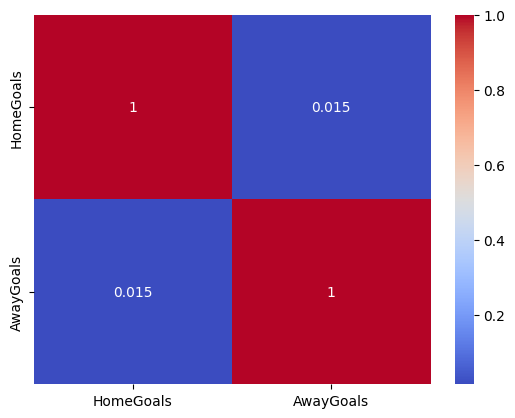

In [175]:
corr = Fdf[['HomeGoals', 'AwayGoals']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### Multivariate Analysis:

In [176]:
Fdf['TotalGoals'] = Fdf['HomeGoals'] + Fdf['AwayGoals']

fig = px.histogram(
    Fdf,
    x='TotalGoals',
    facet_col='Year',
    facet_col_wrap=5,
    nbins=20,
    color_discrete_sequence=['darkBlue'],
    title='Distribution of Total Goals per Match (by Year)'
)

fig.update_layout(
    height=800,
    width=1200,
    showlegend=False,
    title_x=0.5
)
fig.show()

###### **Graphical Integrity and visualisation principles**:

- Trellis histograms allow comparison of distributions across groups, following the principle of showing data variation efficiently.

- The layout reduces redundant axis labels, which improves data-ink ratio.

- Maintains graphical integrity as bin sizes and axes are consistent across panels.

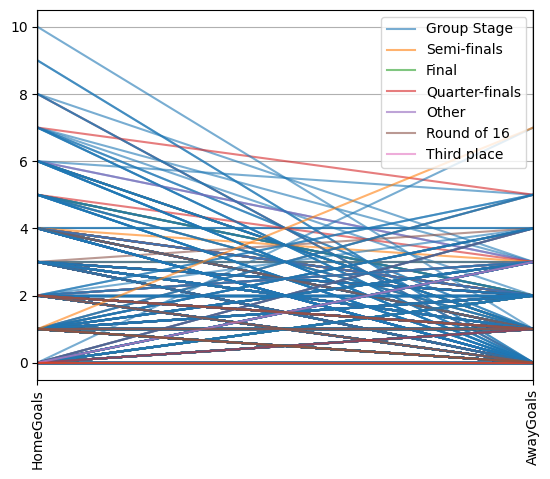

In [177]:
colors = sns.color_palette("tab10")
parallel_coordinates(Fdf[['Round_Broad_Category','HomeGoals','AwayGoals']], 'Round_Broad_Category', color=colors, alpha=0.6)
plt.xticks(rotation=90)
plt.show()

### Hypothesis:

<b>Statement</b>: </br>
Over the years, World Cup matches have become more competitive, i.e the total goals become fewer and fewer (more frequent at 1,2, and 3)

<b>Reasoning</b>: </br>
From the trellis plot, later tournaments (2000s–2010s) show wider goal distributions i.e more matches with 3 or less total goals compared to older tournaments where most matches had somewhat equal distribution for all total goals.
This could suggest that defensive strategies have evolved over time, hence making the goal scoring more tough

<b>Another Observation</b>: </br>
Certain countries, such as Brazil, have consistently reached advanced World Cup stages, leading to repeated matchups with top-performing teams.
From the “Top 10 Most Frequent Country Matchups” chart, Brazil appears in most recurring match pairs e.g., vs Sweden, vs Mexico, vs France, suggesting that Brazil frequently advances to stages where it meets other strong teams.

### Testing our Hypothesis:


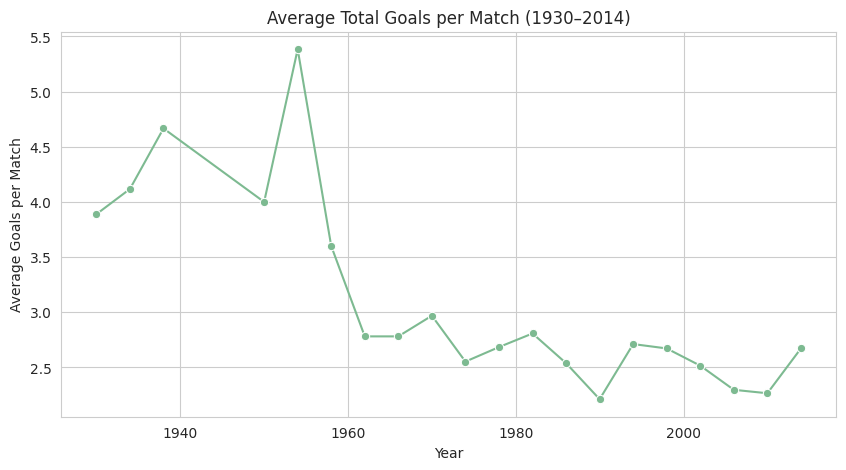

In [178]:
# calculating the average total goals per year
avg_goals_per_year = Fdf.groupby('Year')['TotalGoals'].mean().reset_index()

sns.set_style("whitegrid")
sns.set_palette("crest")

plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='TotalGoals', data=avg_goals_per_year, marker='o')
plt.title('Average Total Goals per Match (1930–2014)')
plt.ylabel('Average Goals per Match')
plt.show()

###### **Graphical Integrity and visualisation principles**
- The line effectively shows trends over time, following the principle of showing data variation, not decoration.

- Using markers for each point could reduce data-ink ratio if not necessary.

- The slope accurately represents changes, maintaining graphical integrity.

### Conclusion:
Hence we can see that the average total scores drops as years progress, we can see that the average total scores drops as years progress explaining that indeed scoring of goals became tougher and games became more competitive

# Network diagram for all football matches of the 2014 world cup

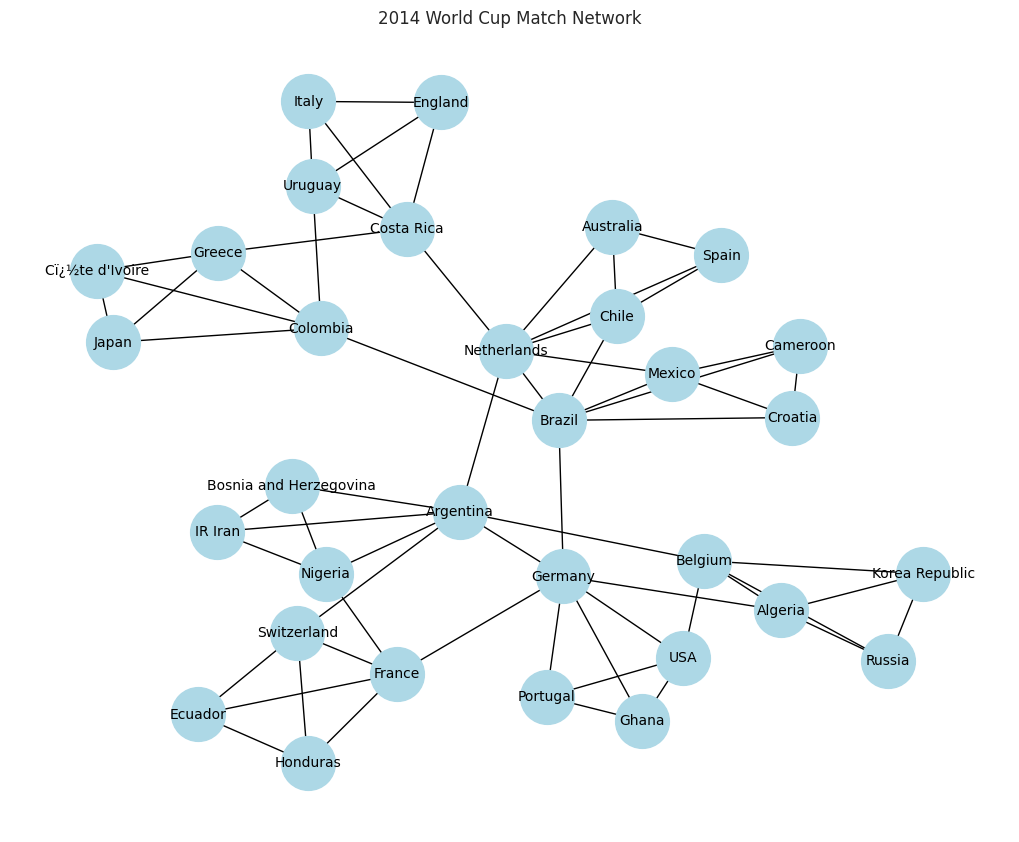

In [179]:
import networkx as nx

# filtering the 2014 worldcup matches
year_2014 = Fdf[Fdf['Year'] == 2014]

G = nx.Graph()
for _, row in year_2014.iterrows():
    G.add_edge(row['HomeTeam'], row['AwayTeam'])

plt.figure(figsize=(10,8))
pos =  nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=10, edge_color='black')
plt.title('2014 World Cup Match Network')
plt.show()


###### **Graphical Integrity and visualisation principles**
- The network diagram shows relationships and connections effectively, highlighting clusters and key nodes. This follows the principle of showing data relationships clearly.

- Data-ink ratio can be low if there are too many edges or decorative elements, but using clear nodes and edge weights helps maximize it.

- Graphical integrity is maintained if edge thickness or node size accurately represents the underlying data (e.g., number of matches, strength of connection).

- Could be cluttered with too many connections; using filters or grouping improves clarity and readability.

Currently, all nodes and edges are the same size, which makes it harder to see which connections are stronger or more important. Using edge thickness or node size to reflect connection strength would improve clarity and better follow graphical integrity principles.